##### Process the Mnist dataset (Invert and define Edges)

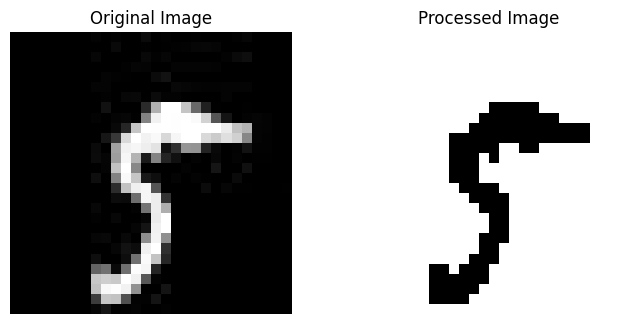

In [51]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def invert_and_threshold(image_path, cell_size=4, threshold=50):
    original_image = Image.open(image_path)
    original_array = np.array(original_image)
    height, width = original_array.shape
    cell_height, cell_width = cell_size, cell_size
    result_array = np.zeros_like(original_array)
    for y in range(0, height, cell_height):
        for x in range(0, width, cell_width):
            cell = original_array[y:y+cell_height, x:x+cell_width]
            white_count = np.sum(cell == 255)
            black_count = np.sum(cell == 0)
            intermediate_pixel = 255 if white_count > black_count else 0
            cell_result = np.where(cell < threshold, 255, 0).astype(np.uint8)
            cell_result = np.where(cell_result == 0, 255, 0)
            result_array[y:y+cell_height, x:x+cell_width] = cell_result

    inverted_array = np.where(result_array < 100, 255, 0).astype(np.uint8)
    result_image = Image.fromarray(inverted_array )

    return result_image

# Example usage
image_path = r"C:\Users\shova\Downloads\Compressed\trainingSet\trainingSet\5\img_10001.jpg"  # Replace with the actual path to your image
result_image = invert_and_threshold(image_path)
result_image.save("mnist_test.jpg")

# Display the original and result images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(np.array(Image.open(image_path)), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Processed Image")
plt.imshow(np.array(result_image), cmap='gray')
plt.axis('off')

plt.show()


#### Display Result 

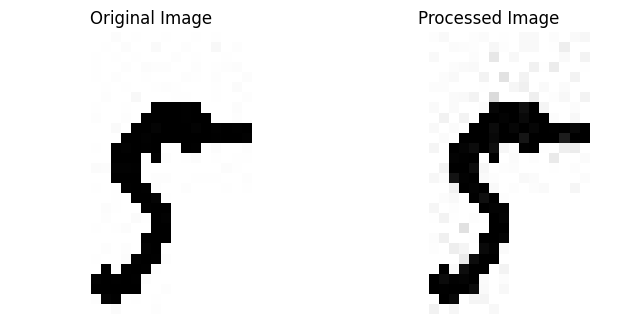

In [53]:
image_path = r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\3_Mnist\Filtered\5\img_10001.jpg"  # Replace with the actual path to your image
result_image = r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\3_Mnist\inverted_images_edges4\5\img_10001.jpg"

# Display the original and result images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(np.array(Image.open(image_path)), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Processed Image")
plt.imshow(np.array(Image.open(result_image)), cmap='gray')
plt.axis('off')

plt.show()


##### Hide MNIST Data into Bit_Manipulated DataSet

In [59]:
from PIL import Image
import numpy as np
import random

# Encoder 
def Encoder(image_path, payload):
    original_image = Image.open(image_path)
    secret_array = np.array(payload.convert('L'))  # Convert payload to grayscale
    original_array = np.array(original_image)

    print(f"Original Image Size: {original_array.shape}")
    print(f"Payload Image Size: {secret_array.shape}")

    # Ensure the payload image is the same size or smaller than the original image
    if secret_array.shape[0] > original_array.shape[0] or secret_array.shape[1] > original_array.shape[1]:
        raise ValueError("Payload image should be smaller or equal in size to the original image.")

    # Choose a random starting position for embedding the payload image
    start_y = random.randint(0, original_array.shape[0] - secret_array.shape[0])
    start_x = random.randint(0, original_array.shape[1] - secret_array.shape[1])

    # Iterate through the payload image and embed it in the LSB of the original image
    for y in range(secret_array.shape[0]):
        for x in range(secret_array.shape[1]):
            original_pixel = original_array[y + start_y, x + start_x]
            secret_pixel = secret_array[y, x]
            modified_pixel = (original_pixel & 0b1111111111111110) | (secret_pixel & 1)
            original_array[y + start_y, x + start_x] = modified_pixel

    steganographic_image = Image.fromarray(original_array)
  
    return steganographic_image

# Paths to images
# input_folder = r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\3_Mnist\inverted_images_edges2\5\img_10001.jpg" 
input_folder = r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\3_Mnist\Filtered\5\img_10001.jpg"
image_path =r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\ORG\BIT_MNIPULATED\2__LSB1.png" 
output_image_path = 'mnist_random.png'

# Load the original image
original_image = Image.open(image_path)
print(f"Original Image Mode: {original_image.mode}")

# Load the smaller image to hide
payload_image = Image.open(input_folder)
print(f"Payload Image Mode: {payload_image.mode}")

# Encode the payload image into the original image
result_image = Encoder(image_path, payload_image)

# Save the result image
result_image.save(output_image_path)


Original Image Mode: L
Payload Image Mode: L
Original Image Size: (256, 256)
Payload Image Size: (28, 28)


#### Decoder 

In [58]:
def decode_rectangle(steganographic_image_path, output_image_path):
    steganographic_image = Image.open(steganographic_image_path)
    steganographic_array = np.array(steganographic_image)
    extracted_rectangle = steganographic_array & 1
    # extracted_image = Image.fromarray((extracted_rectangle * 255).astype(np.uint8))
    extracted_image = Image.fromarray((extracted_rectangle*255).astype(np.uint8))
    extracted_image.save(output_image_path)

    
decode_rectangle(r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\mnist_random.png", "extracted_rectangle2.png")

    